# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [2]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2)  # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

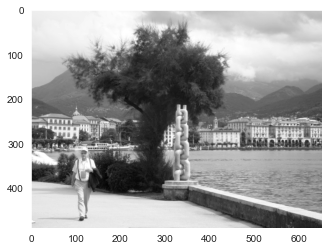

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.grid(False)
imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [4]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

Text(0, 0.5, 'S-value')

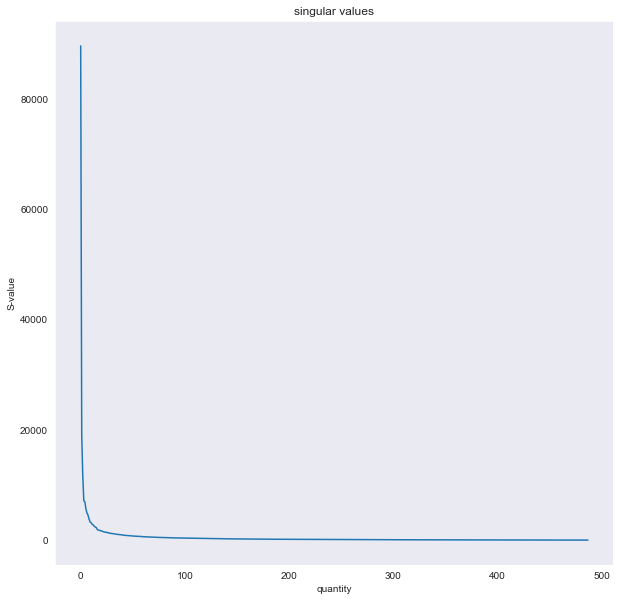

In [5]:
plt.figure(figsize=(10, 10))
plt.plot(S)
plt.grid(False)
plt.title('singular values')
plt.xlabel('quantity')
plt.ylabel('S-value')

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

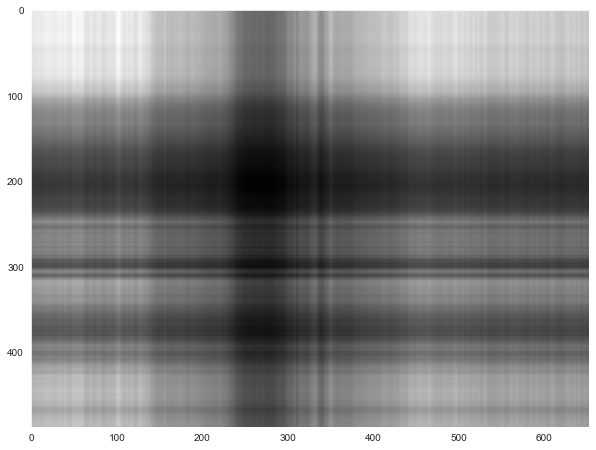

In [6]:
data = np.dot(U[:, :1], VT[:1]) * S[0]
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.imshow(data, cmap='gray')

На самом деле это именно то, чего я и ожидал, потому что это была первая $\sum$, поэтому изображение вышло не таким чётким, как хотелось бы.

С увеличением $\sum$ будет улучшаться и качество и появляться новые детали.

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

In [7]:
diag_S = np.diag(S)

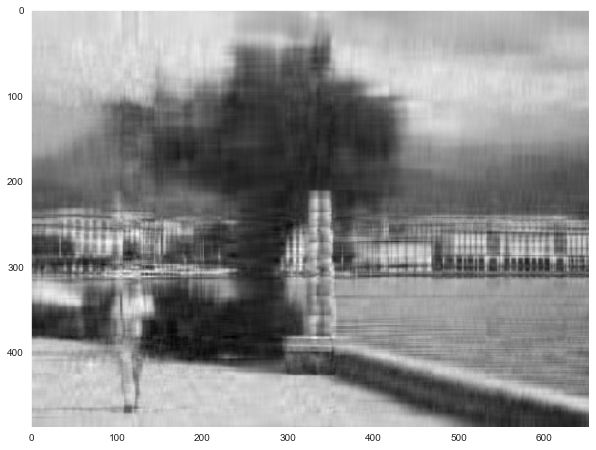

In [8]:
# c 1 по 20
data = np.dot(U[:, :20], np.dot(diag_S[:20, :20], VT[:20]))
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.imshow(data, cmap='gray')

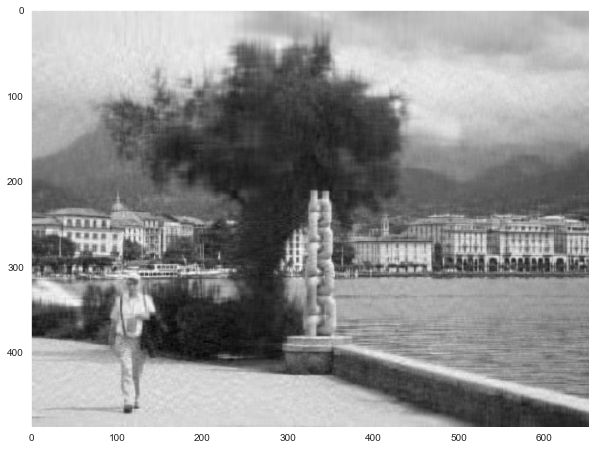

In [9]:
# c 1 по 50
data = np.dot(U[:, :50], np.dot(diag_S[:50, :50], VT[:50]))
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.imshow(data, cmap='gray')

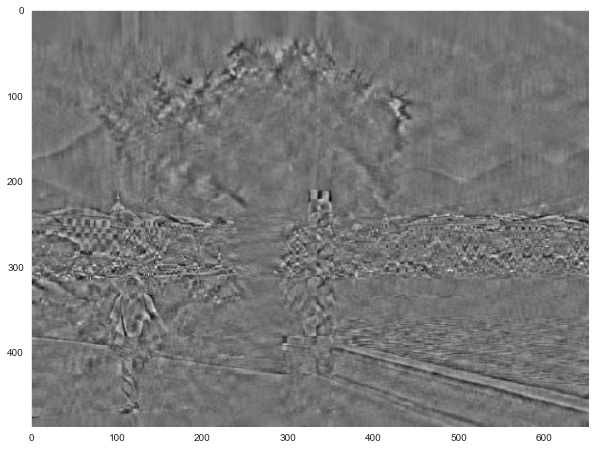

In [10]:
# c 20 по 100
data = np.dot(U[:, 20:100], np.dot(diag_S[20:100, 20:100], VT[20:100]))
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.imshow(data, cmap='gray')

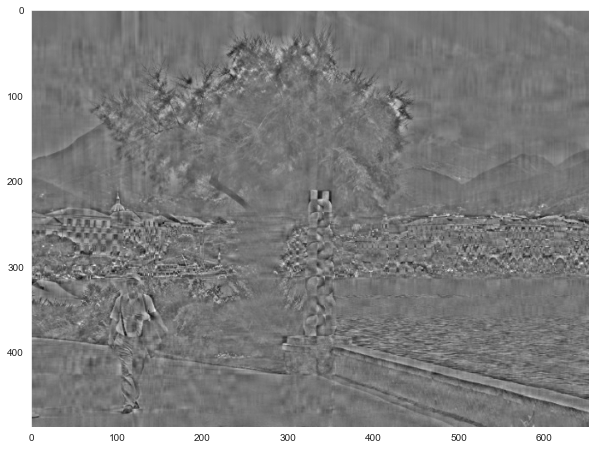

In [11]:
# с 20 до последней
data = np.dot(U[:, 20:], np.dot(diag_S[20:, 20:], VT[20:]))
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.imshow(data, cmap='gray')

Можно сделать вывод о том, что если брать значения на отрезке от [1, x], то есть на префиксе, то тогда картинка получается наиболее чёткой.

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Воспользуемся теоремой о низкоранговом приближении. Чтобы добиться наилучшего результата по норме Фробениуса надо брать начальные значения, то есть значения на префиксе. Это прекрасно видно в предыдущем номере. К тому же чем ближе мы берём к последнему значению, тем лучше точность и качество картинки. Очевидно, что можно взять все значения и получить в точности саму картинку, но это скучно, поэтому возьмём с 1 по 100 значение и посмотрим на результат.

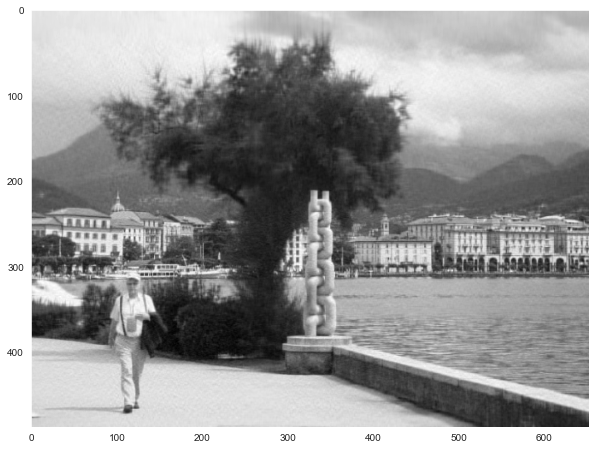

In [12]:
data = np.dot(U[:, :100], np.dot(diag_S[:100, :100], VT[:100]))
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.imshow(data, cmap='gray')

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

**Пусть исходное изображение имело размер $M\times N$. Теперь, когда мы храним первые $r$ столбцов матриц $U, V$ и первые $k$ диагональных элементов матрицы $Σ$. Тогда по памяти будет $r\cdot m + r\cdot n + r = r(m + n + 1)$, значит затраты по памяти уменьшатся в $\frac{mn}{ r(m + n + 1)}$ раз.**

Сначала высчитаем то, сколько нам надо памяти для хранения:


Это в точности $M \times N =  img.shape[0] \times img.shape[1] = 488 \times 653 = 318664  $


Теперь оценим то, сколько теперь памяти тратим на хранение:

Это $r(M + N + 1) =  100(img.shape[0] + img.shape[1]+1) = 100(488 + 653 + 1) =  114200$

Значит удалось сжать:

In [13]:
print(f'k = {318664 / 114200}')

k = 2.790402802101576


**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [14]:
# Посчитаем с помощью np.bytes
print(f'исходное изображение : {img.nbytes}')
print(f'после сжатия  : {U[:100].nbytes + (diag_S[:100, :100]).nbytes + VT[:100].nbytes}')

исходное изображение : 2549312
после сжатия  : 992800


Тогда посмотрим на img.shape:

In [15]:
img.shape

(488, 653)

In [16]:
print(f' исходное изображение: {488 * 653 * 8}')
print(f' после сжатия: {8 * 100 * (488 + 653 + 1)}')

 исходное изображение: 2549312
 после сжатия: 913600


Как мы видим, что после сжатия затраты по памяти не совсем сходятся, возможно, это проблема np.bytes, однако если использовать np.size, то всё сходится.

In [17]:
(np.size(U[:100]) + np.size(diag_S[:100, :100]) + np.size(VT[:100])) * 8

992800

Вот теперь всё сходится с моими представлениями реальности и бытия существования сия света и мира....

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

Рассмотрим самосопряжённый оператор $\phi(\omega) = X^TX\omega$. Он является самосопряжённым, так как симметричность матрицы $X^TX$ - достаточное условие самосопряжённости оператора. Тогда согласно конечномерной спектральной теореме(возможно в русской версии она называется не так, но на английский манер - это $\textit{spectral theorem}$) $\exists$ ортонормированный базис, который состоит из собственных значений.



Пусть этот базис - это $v_1, v_2, ..., v_n$. Тогда давайте представим наш вектор $w$ в виде линейной комбинации базисных векторов $$w = a_1v_1 + a_2v_2 + ... + a_nv_n$$

Значит, $|w| = \sqrt{a_1^2 + a_2^2 + ... + a_n^2}$

Теперь посмотрим на то, как оператор действует на $\omega$:
$$ \phi(\omega) = a_1\phi(v_1) +a_2\phi(v_2) + .. + a_n\phi(v_n) = a_1\sigma_1^2v_1 + a_2\sigma_2^2v_2 + ... + a_n\sigma_n^2v_n,$$

где $\sigma_i^2$- собственное значение матрицы $X^TX$, отсюда понятен второй переход, так как оператор действует на собственные вектора просто растягиванием в $\sigma_i^2$ раз.

Теперь снова посмотрим на $|X\omega|^2$:


$$|Xw|^2 = (Xw)^T(Xw) = w^T X^TXw = w^T(X^TXw) = w^T (a_1σ_1^2v_1 + a_2σ_2^2v_2 + ... + a_nσ_n^2v_n) = a_1^2σ_1^2 + a_2^2σ_2^2 + ... + a_n^2σ_n^2$ (так как $|v_i^2| = 1$). $$

Однако, $\sigma_1 = \max\limits_{i \in [1, n]} \sigma_i$, значит, $a_1^2σ_1^2 + a_2^2σ_2^2 + ... + a_n^2σ_n^2 \leq \sigma_1^2(a_1^2 + a_2^2 + ... + a_n^2) = σ_1^2|w|^2$


Отсюда, $|Xw|^2 \leq \sigma_1^2|w|^2 \implies \frac{|Xw|}{|w|} \leq \sigma_1$

**Это завершает доказательство первого равенства**

---


**Приступим ко второму равенству.**

Пусть $\omega = \alpha \cdot v$ и $|v| = 1$, тогда $ \sigma_1 = \max\limits_{w} \frac{|Xw|}{|w|} \Longleftrightarrow \sigma_1 = \max\limits_{\alpha v} \frac{|X\alpha v|}{|\alpha v|} = \max\limits_{\alpha v}\frac{|Xv|}{|v|} = \max\limits_{|v| = 1}{|Xv|}$


**Это завершает доказательство второго равенства**

---

**Приступим к третьему равенству.**

$\max\limits_{|v| = 1}|Xv| = \max\limits_{|v| = 1}\sqrt{v^TX^TXv} = \max\limits_{|u|=|v| = 1}\sqrt{v^TX^T|u|^2Xv} =  \max\limits_{|u|=|v| = 1}\sqrt{v^TX^Tuu^TXv} = \max\limits_{|u|=|v| = 1}\sqrt{(u^TXv)^T(u^TXv)}  = \max\limits_{|u|=|v| = 1}|u^TXv| =  \sigma_1 $


**Это завершает доказательство третьего равенства**

---

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

Покажем, что $rkA = 1$. Действительно, рассмотрим две $i$-ую строчку и $j$-ую строчку и заметим, что они приводятся к одному виду путём домножения первой на $\frac{1}{sin(i)}$, а второй на $\frac{1}{sin(j)}$. Значит все строки линейно зависимы $\implies rkA = 1$

---

Теперь заметим, что если взять $x_1 = \sqrt{\sum_{i = 0}^{n-1} sin^2(i)$ и $x_2 = \sqrt{\sum_{i = 0}^{n-1} cos^2(i)$, где $x_1, x_2$ - коэффициенты, нужные, чтобы столбцы матриц $U, V$ были ортонормированными.

Тогда прямая проверка показывает, что $SVD$ разложение исходной матрицы - это $$\begin{pmatrix} \frac{sin(0)}{x_1} \\ \vdots \\ \frac{sin(n-1)}{x_1} \end{pmatrix} \ \begin{pmatrix} x_1\cdot x_2\end{pmatrix} \begin{pmatrix} \frac{cos(0)}{x_2} \\ \vdots \\ \frac{cos(n-1)}{x_2} \end{pmatrix}^T$$

---

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

 Мы знаем, что $A = U\Sigma V^T$, отсюда $AV = U\Sigma$, так как $V$ - ортогональная матрица, то есть, $VV^T = E$.


Из теоремы о низкораноговом приближении следует, что$rk\Sigma = r$, так как $rkA = r$.


Значит, $\Sigma$ имеет вид:

$$\begin{pmatrix}
  σ_1& 0& …& 0&…& 0\\
  0& \sigma_2&  …& 0&…& 0\\
  0& 0&  …& σ_r&…& 0\\
  \vdots&\vdots\ &&\vdots& &\vdots\\
  0& 0&  …& 0&…& 0\\
\end{pmatrix}$$

Отсюда видно, что при действии $\mathcal{A}$ на вектор $v_i, \,\,\,\,  1 \leq i \leq r$ его образом является вектор $\sigma_iu_i$, где $u_i$ - столбец матрицы $U$, а при действии на вектор $v_i, \,\,\,\, r < i \leq n$  его образом является $0$, значит $Ker\mathcal{A} = \langle v_{r+1}, ..., v_{n} \rangle$.


Параллельно мы поняли, что при действии $\mathcal{A}$ не зануляются только $v_i, \,\,\,\,  1 \leq i \leq r$. Осталось заметить, что они переходят в вектор $\sigma_iu_i$, значит векторы $u_i, i\leq r$ образуют базис образа $\mathcal{A}$.

Значит, $Im\mathcal{A} = \langle u_1, ..., u_r \rangle$.

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Рассмотрим $SVD$ разложение матрицы $A$. То есть $A = U\Sigma V^T$. Мы знаем, что столбцы матрицы $A$ линейно независимы $\implies rkA = n \implies rk\Sigma = n$ (опять же следствие теоремы о низкоранговом приближении).


В силу замечания, что $rk\Sigma = n$ мы знаем, что $\Sigma$ имеет вид:

$$ \begin{pmatrix}
        \sigma_1& 0& …& 0&…& 0\\
        0& \sigma_2&  …& 0&…& 0\\
        0& 0&  …& \sigma_r&…& 0\\
        \vdots&\vdots\ &&\vdots& &\vdots\\
        0& 0&  …& 0&…& \sigma_n\\
         0& 0&  …& 0&…& 0\\
         \vdots&\vdots\ &&\vdots& &\vdots\\
          0& 0&  …& 0&…& 0\\
  \end{pmatrix}
$$


Легко понять, как выглядит тогда $\Sigma^T\Sigma$:

$$\begin{pmatrix}
  \sigma_1^2& 0& …& 0&…& 0\\
  0& \sigma_2^2&  …& 0&…& 0\\
  0& 0&  …& \sigma_r^2&…& 0\\
  \vdots&\vdots\ &&\vdots& &\vdots\\
  0& 0&  …& 0&…& \sigma_n^2\\
\end{pmatrix}$$


Мы знаем, что $A = U\Sigma V^T$, тогда $$P = A(A^TA)^{-1}A^T = U\Sigma V^T(V\Sigma^TU^TU\Sigma  V^T)^{-1}V\Sigma^TU^T = U\Sigma V^T(V\Sigma^T\Sigma V^T)^{-1}V\Sigma^TU^T = U\Sigma V^TV^{-T}(\Sigma^T\Sigma)^{-1}V^{-1}V\Sigma^TU^T = U\Sigma(\Sigma^T\Sigma)^{-1}\Sigma^TU^T$$

Стоит отметить, что у матрицы $V\Sigma^TU^TU\Sigma V^T$ есть обратная, потому что у каждой из матриц: $V, V^T, \Sigma^T\Sigma$ есть обратные. Обратную для $\Sigma^T\Sigma$ можно увидеть чуть пониже.

Давайте посчитаем, как выглядит $\Sigma (\Sigma^T\Sigma)^{-1}\Sigma^T$.


Получаем, что матрица $\Sigma (\Sigma^T\Sigma)^{-1}\Sigma^T$  $$\begin{pmatrix}
        1& 0& …& 0&…& 0&…& 0&…& 0\\
        0& 1&  …& 0&…& 0&…& 0&…& 0\\
        0& 0&  …& 1&…& 0&…& 0&…& 0\\
        \vdots&\vdots\ &&\vdots& &\vdots&&\vdots&&\vdots\\
        0& 0&  …& 0&…& 1&…& 0&…& 0\\
        0& 0&  …& 0&…& 0&…& 0&…& 0\\
         \vdots&\vdots\ &&\vdots& &\vdots&&\vdots&&\vdots\\
          0& 0&  …& 0&…& 0&…& 0&…& 0\\
  \end{pmatrix}$$

является матрицей $\Sigma$ из полного сингулярного разложения матрицы $P$.



**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


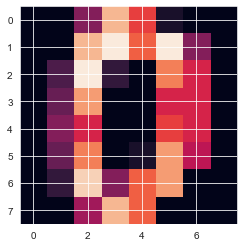

In [18]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8, 8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [19]:
U, S, VT = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

In [20]:
def draw_a_picture_bitch(features):
    X = [[] for i in range(10)]
    Y = [[] for i in range(10)]

    plt.figure(figsize=(13, 10))
    for i in range(features.shape[0]):
        X[digits.target[i]].append(features[:, 0][i])
        Y[digits.target[i]].append(features[0:, 1][i])

    for i in range(10):
        plt.scatter(X[i], Y[i], label=str(i), marker=f'${i}$')

    plt.legend()

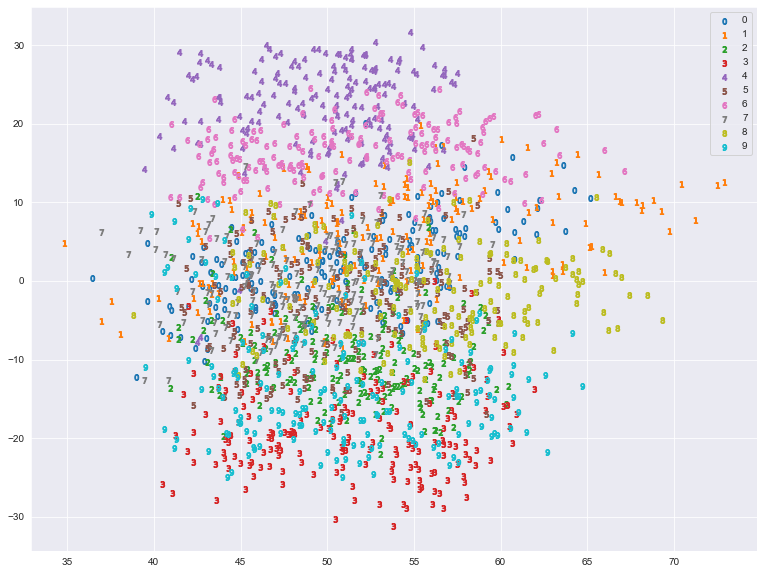

In [21]:
US = np.dot(U, np.diag(S))
draw_a_picture_bitch(US)

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

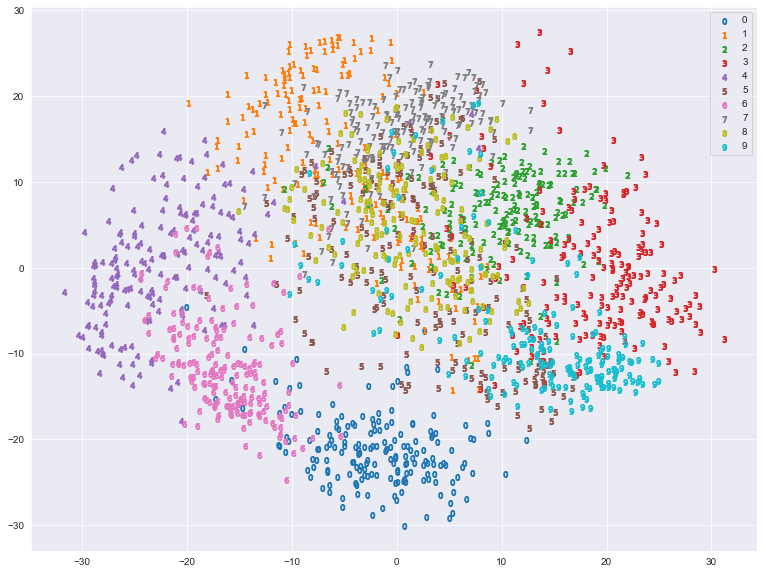

In [22]:
import copy

data = copy.deepcopy(digits.data)
data = data - data.mean(axis=0, keepdims=True)
U, S, VT = svd(data, full_matrices=False)

US = np.dot(U, np.diag(S))
draw_a_picture_bitch(US)

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

Ну на первой картинке точки с одинаковыми значениями очень хаотично раскиданы, да и вообще всё очень хаотично, а в последней визуализации все точки с одинаковыми значениями собраны в свои прайды, группки, стаи , называть можно по-разному ;)

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

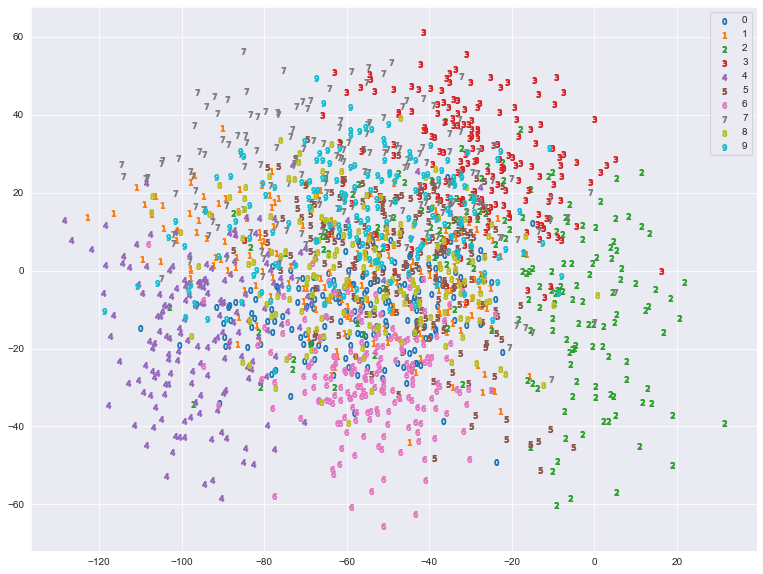

In [23]:
from sklearn.random_projection import GaussianRandomProjection

rng = np.random.RandomState(42)
transformer = GaussianRandomProjection(n_components=2, random_state=rng)
data = transformer.fit_transform(digits.data)
U, S, VT = svd(data, full_matrices=False)
US = np.dot(U, np.diag(S))
draw_a_picture_bitch(US)

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [24]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/vdovetzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/vdovetzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/vdovetzi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

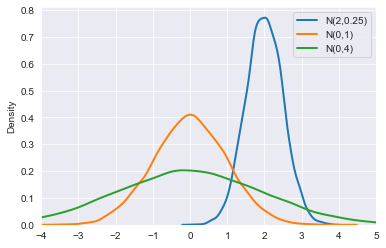

In [25]:
N = 10000
plt.xlim([-4, 5])
s = np.random.normal(loc=2, scale=0.5, size=N)  # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)  # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)  # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,  # color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')
plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат. 
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<AxesSubplot:>

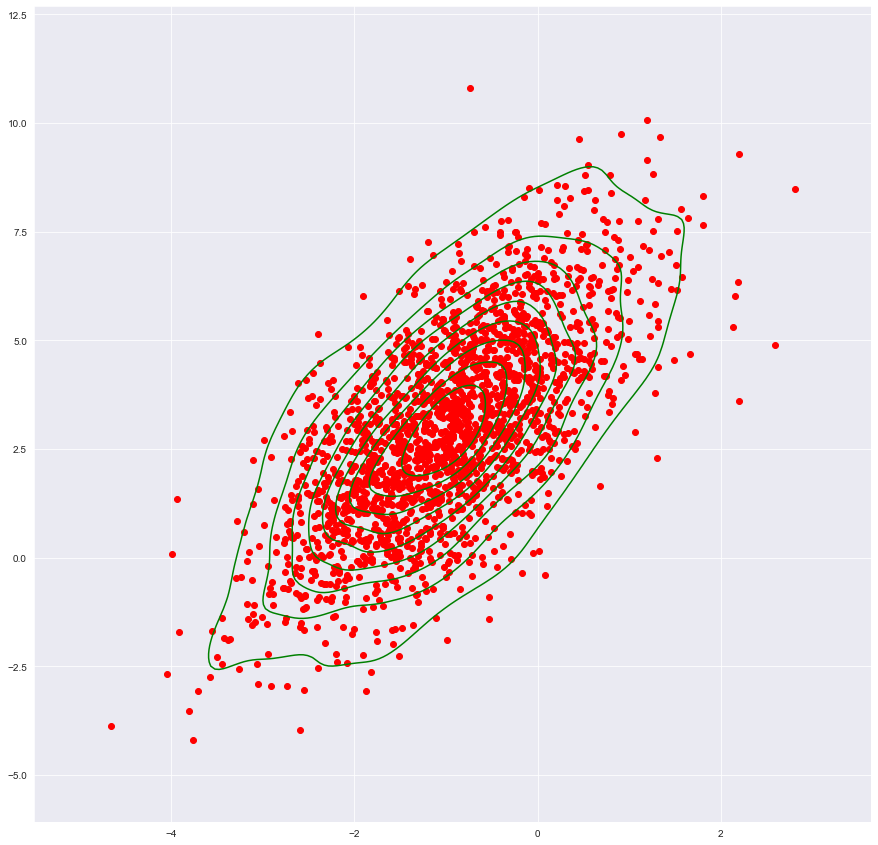

In [26]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1, 3]), cov=np.array([[1, 1.5], [1.5, 5]]), size=N)
plt.figure(figsize=(15, 15))
plt.scatter(s[:, 0], s[:, 1], color='red')
sns.kdeplot(data=s, shade=False, color='g', x=s[:, 0], y=s[:, 1])

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

<AxesSubplot:>

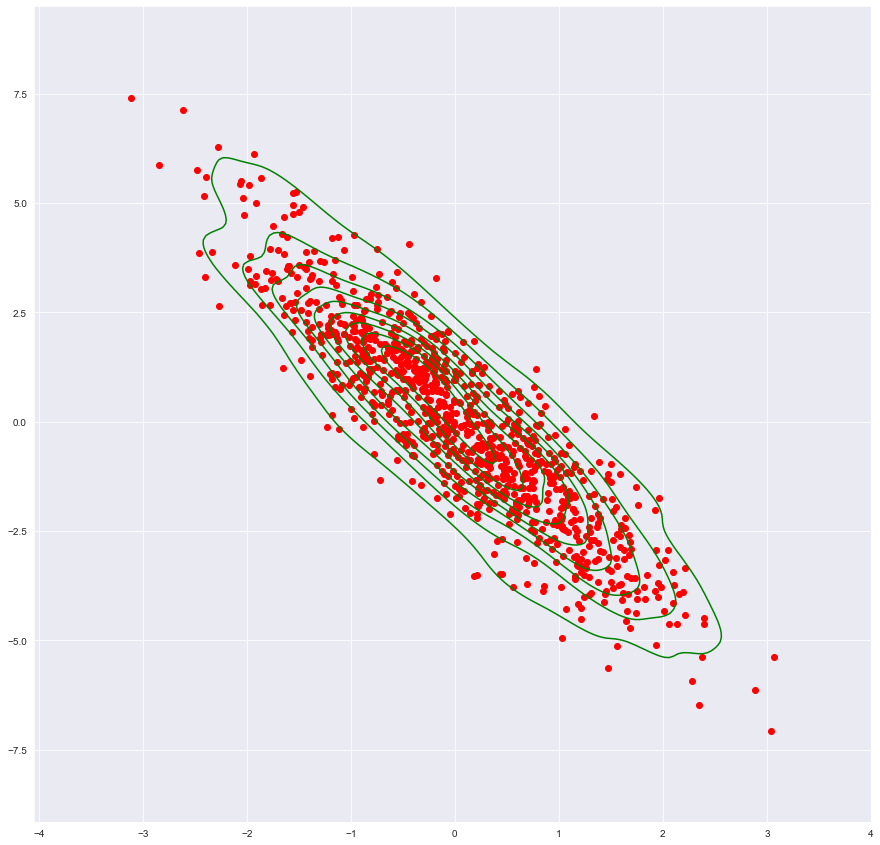

In [27]:
import seaborn as sns
import numpy as np

N = 1000
s = np.random.multivariate_normal(mean=np.array([0, 0]), cov=np.array([[1, -2], [-2, 5]]), size=N)
plt.figure(figsize=(15, 15))
plt.scatter(s[:, 0], s[:, 1], color='red')
sns.kdeplot(data=s, shade=False, color='g', x=s[:, 0], y=s[:, 1])

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

<AxesSubplot:>

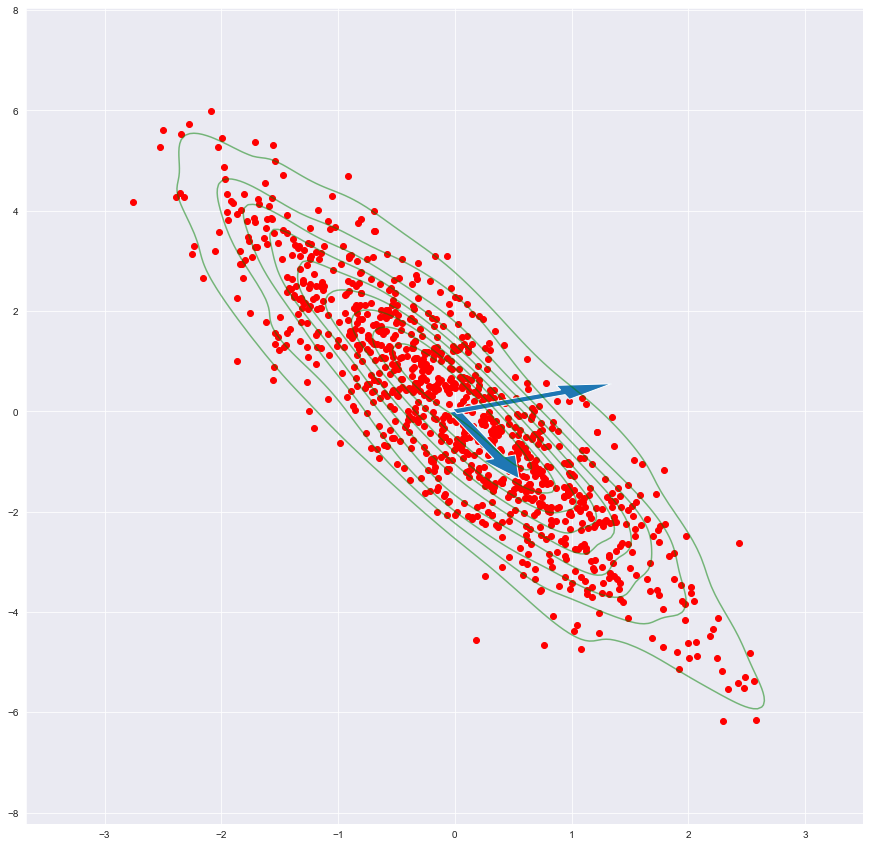

In [28]:
X = np.random.multivariate_normal(mean=np.array([0, 0]), cov=np.array([[1, -2], [-2, 5]]), size=N)
U, S, VT = svd(X, full_matrices=False)

plt.figure(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1], color='red')
plt.arrow(0, 0, VT[0, 0], VT[0, 1], width=0.1)
plt.arrow(0, 0, VT[1, 0], VT[1, 1], width=0.1)
sns.kdeplot(data=X, shade=False, color='g', alpha=0.5, x=X[:, 0], y=X[:, 1])




**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

Нам дана матрица ковариации $\Sigma$:

$$ \Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix} $$

Чтобы привести матрицу к главным осям надо сначала найти её хар. многочлен и его корни:


$$det(\Sigma - \lambda E) = \begin{pmatrix}
1 - \lambda & -2\\
-2 & 5 - \lambda
\end{pmatrix} = \lambda^2 - 6\lambda +1$$

Отсюда, $\lambda_1 = 3-2\sqrt{2}$ и $\lambda_2 = 3 +2\sqrt{2}$

Тогда понятно, что матрица, приведённая к главным осям выглядит, как $$  \Sigma' = \left(
\begin{matrix}
3 - 2\sqrt{2} & 0 \\
0 & 3 + 2\sqrt{2}
\end{matrix} \right)$$

Теперь поищем собственные векторы матрицы:

Если $\lambda_1 = 3-2\sqrt{2}$:

$$\Sigma - \lambda_1 E =
\begin{pmatrix}
1 - 3 + 2\sqrt{2} & -2\\
-2 & 5 - 3 + 2\sqrt{2}
\end{pmatrix} \rightarrow
\begin{pmatrix}
1 & \sqrt{2} - 1\\
0 & 0
\end{pmatrix}$$


Найдя ФСР, находим, что $$
v_1 = \left(
\begin{matrix}
1 - \sqrt{2} \\
1
\end{matrix} \right) $$

Если $\lambda_2 = 3+2\sqrt{2}$:

$$\Sigma - \lambda_2 E =
\begin{pmatrix}
1 - 3 - 2\sqrt{2} & -2\\
-2 & 5 - 3  -2\sqrt{2}
\end{pmatrix} \rightarrow
\begin{pmatrix}
1 & -\sqrt{2} - 1\\
0 & 0
\end{pmatrix}$$


Найдя ФСР, находим, что $$
v_2 = \left(
\begin{matrix}
1 + \sqrt{2} \\
1
\end{matrix} \right) $$


$v_1$ и $v_2$ уже ортогональны. Так как главные оси образуют базис, то надо дополнительно ортонормировать наши вектора:

$v'_1 = \frac{v_1}{|v_1|} = \left(
\begin{matrix}
\frac{1 - \sqrt{2}}{\sqrt{4 - 2\sqrt{2}}} \\
\frac{1}{\sqrt{4 - 2\sqrt{2}}}
\end{matrix} \right)$


$ v'_2 = \frac{v_2}{|v_2|} = \left(
\begin{matrix}
\frac{1 + \sqrt{2}}{\sqrt{4 + 2\sqrt{2}}} \\
\frac{1}{\sqrt{4 + 2\sqrt{2}}}
\end{matrix} \right)$




Убедимся в том, что они соответствуют направлению главных осей:

Воспользуемся формулой направления и посчитаем угол $\theta = arctg(\frac{y}{x})$

Тогда, $$\theta_1 = arctg(\frac{1}{1-\sqrt{2}}) = arctg(-1-\sqrt{2})$$ $$\theta_2 = arctg(\frac{1}{1+\sqrt{2}}) = arctg(\sqrt{2}-1) $$

In [40]:
print(np.degrees(np.arctan(-1 - np.sqrt(2))))
print(np.degrees(np.arctan(np.sqrt(2) - 1)))

-67.5
22.500000000000007


Ну и это примерно и совпадает с напрвлением главных осей.

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

/var/folders/dg/q4mp1xgx6bl9_mppl90mdzbw0000gn/T/ipykernel_3617/1728365782.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  A = np.random.multivariate_normal(mean=np.array([-1, 0]), cov=C, size=N)
/var/folders/dg/q4mp1xgx6bl9_mppl90mdzbw0000gn/T/ipykernel_3617/1728365782.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  B = np.random.multivariate_normal(mean=np.array([1, 0]), cov=C, size=N)


<AxesSubplot:>

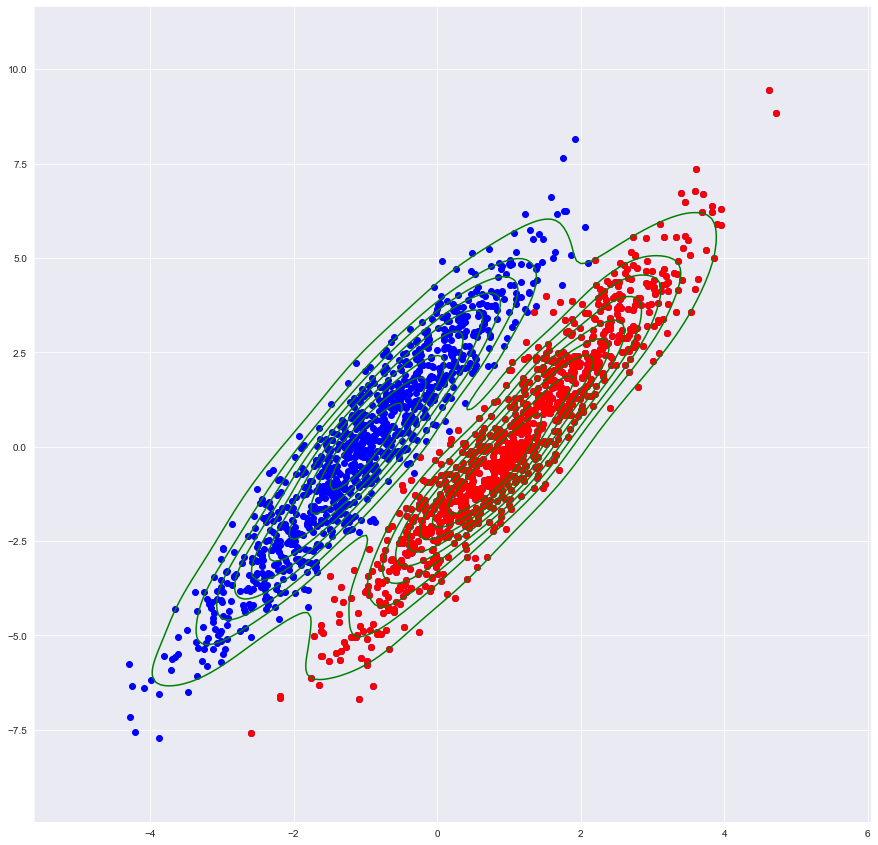

In [30]:
N = 1000

C = np.array([[1, 2], [3, 7]])
A = np.random.multivariate_normal(mean=np.array([-1, 0]), cov=C, size=N)
B = np.random.multivariate_normal(mean=np.array([1, 0]), cov=C, size=N)
X = np.concatenate((A, B))
plt.figure(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1], color='b')
plt.scatter(B[:, 0], B[:, 1], color='r')

sns.kdeplot(data=X, shade=False, color='g', x=X[:, 0], y=X[:, 1])

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

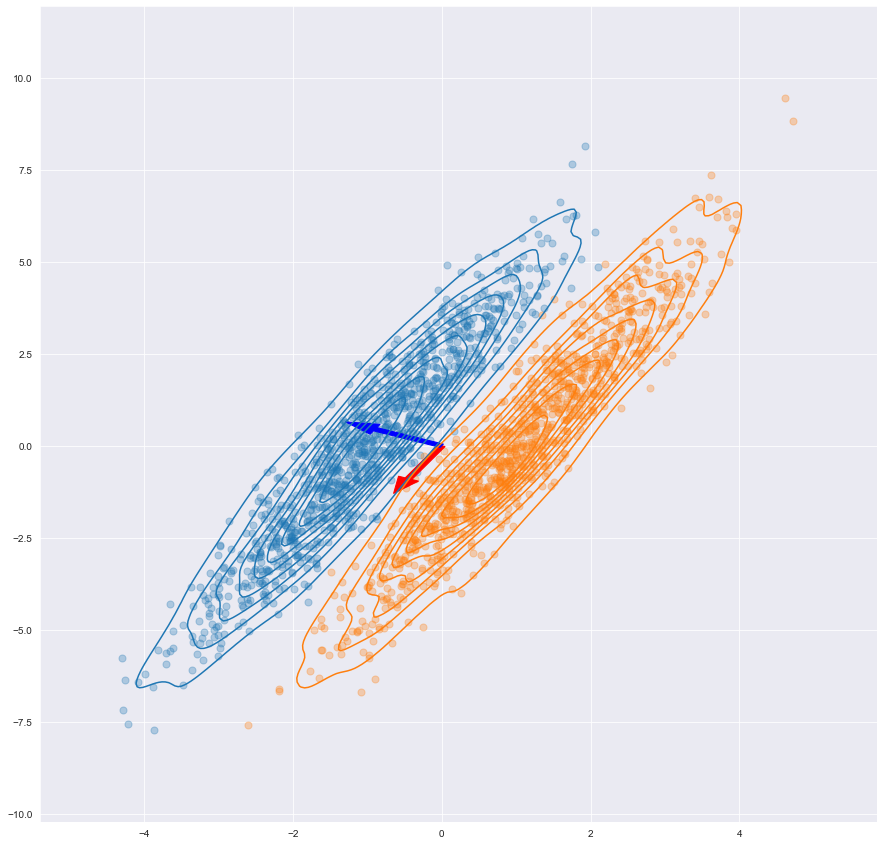

In [31]:
U, S, VT = svd(X, full_matrices=False)

plt.figure(figsize=(15, 15))
plt.scatter(A[:, 0], A[:, 1], s=50, alpha=0.3)
plt.scatter(B[:, 0], B[:, 1], s=50, alpha=0.3)
sns.kdeplot(data=A, shade=False, x=A[:, 0], y=A[:, 1])
sns.kdeplot(data=B, shade=False, x=B[:, 0], y=B[:, 1])
plt.arrow(0, 0, VT[0, 0], VT[0, 1], color='r', width=0.1)
plt.arrow(0, 0, VT[1, 0], VT[1, 1], color='b', width=0.1)

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

Думаю, что возможно красный вектор помогает обнаружить эту структуру, потому что если через него провести прямую, то она как раз разделит два эллипса.

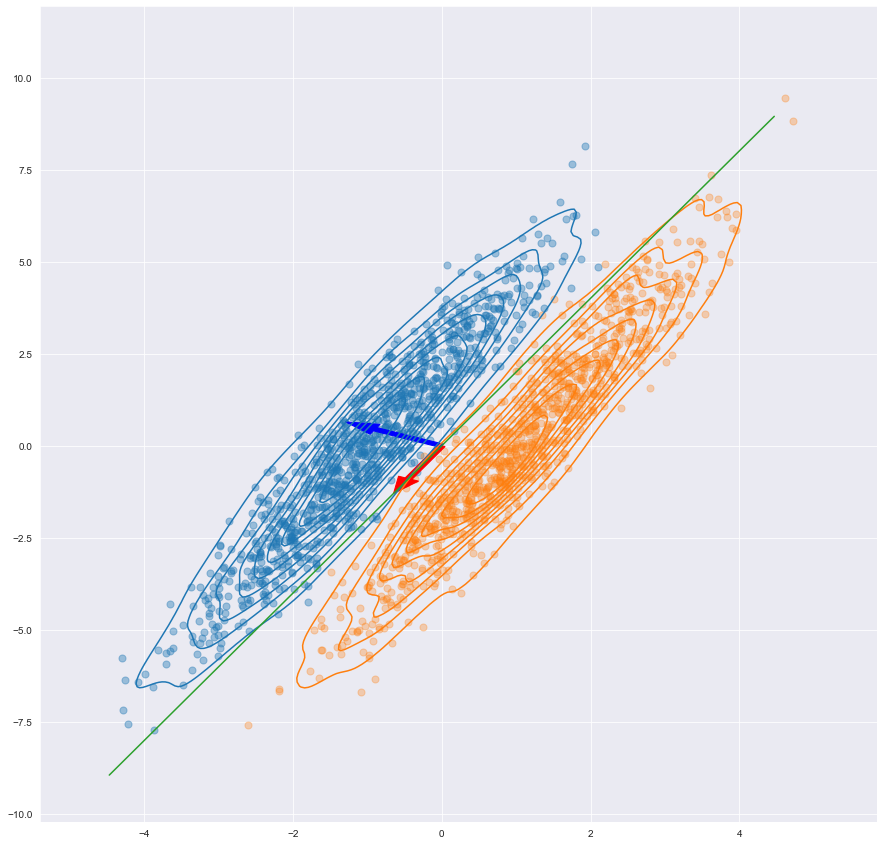

In [32]:
plt.figure(figsize=(15, 15))
plt.scatter(A[:, 0], A[:, 1], s=50, alpha=0.4)
plt.scatter(B[:, 0], B[:, 1], s=50, alpha=0.3)
sns.kdeplot(data=A, shade=False, x=A[:, 0], y=A[:, 1])
sns.kdeplot(data=B, shade=False, x=B[:, 0], y=B[:, 1])
plt.arrow(0, 0, VT[0, 0], VT[0, 1], color='r', width=0.1)
plt.arrow(0, 0, VT[1, 0], VT[1, 1], color='b', width=0.1)
plt.plot([VT[0, 0] * (-10), VT[0, 0] * 10], [VT[0, 1] * (-10), VT[0, 1] * 10])

Судя по тому, что мы видим, у нас достаточно хорошо получилось разделить два эллипса, однако некоторые точки всё равно проскочили на другой эллипс, поэтому SVD признаки тут не сильно помогут.

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

<AxesSubplot:>

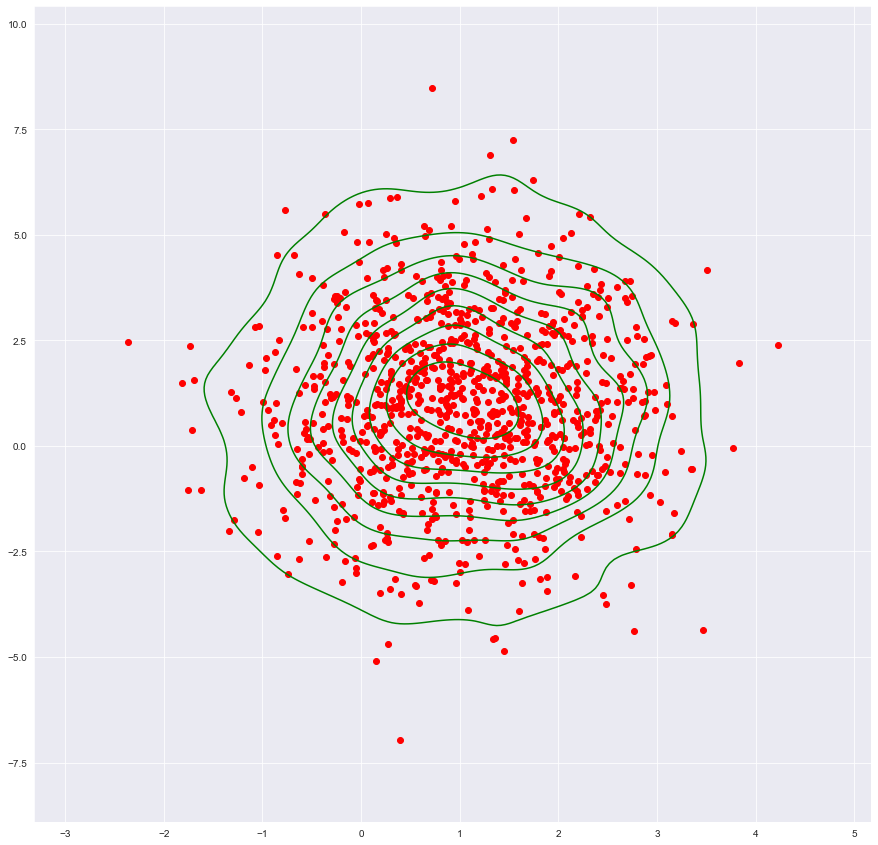

In [33]:
import seaborn as sns
import numpy as np

N = 1000
X = np.random.multivariate_normal(mean=np.array([1, 1]), cov=np.array([[1, 0], [0, 4]]), size=N)
plt.figure(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1], color='red')
sns.kdeplot(data=X, shade=False, color='g', x=X[:, 0], y=X[:, 1])

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Если вспомнить то, что мы делали для определения направления в номере 3, то становится понятно, что тут собственные значения можно узнать просто глядя на матрицу $\Sigma$ (это 1 и 4). Потом мы искали собственные вектора, которые тоже ищутся методом пристального взгляда ( ($1, 0$) и ($0, 1$) ) . Ортонормировать их тоже можно в уме и получим, что наши вектора, направление которых будут совпадать с направлением главных осей - это ($1, 0$) и ($0, 1$). Значит направления наших главных осей совпадает с направлением оси ординат и абсцисс. То есть главные оси параллельны осям.

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

<AxesSubplot:>

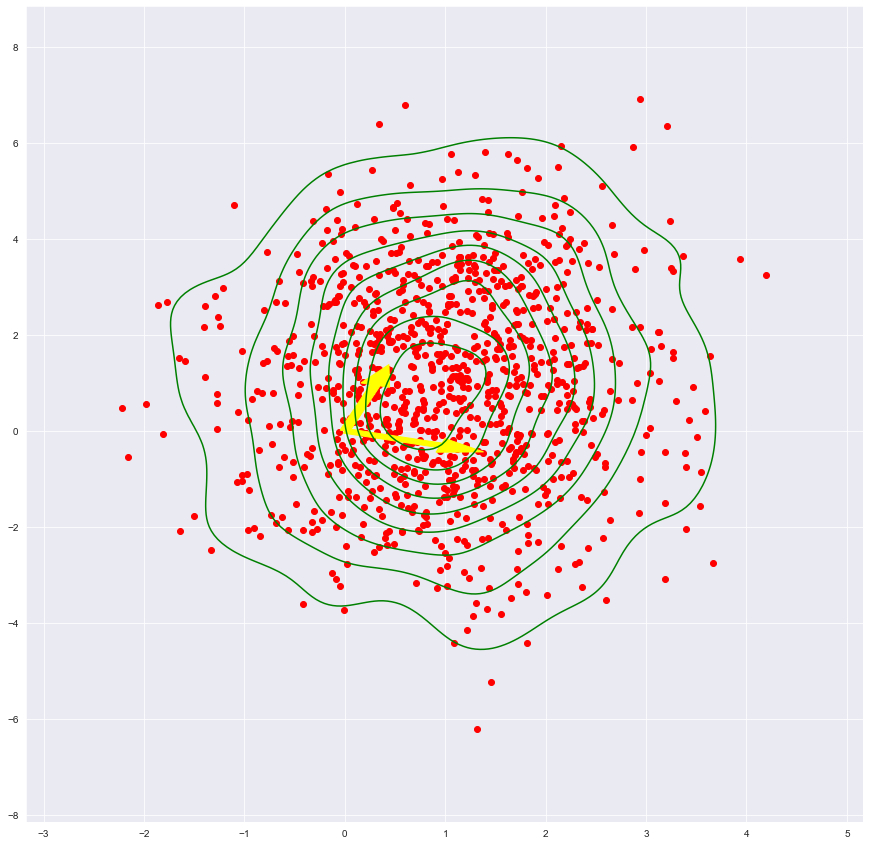

In [34]:
N = 1000
X = np.random.multivariate_normal(mean=np.array([1, 1]), cov=np.array([[1, 0], [0, 4]]), size=N)
U, S, VT = svd(X, full_matrices=False)

plt.figure(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1], color='red')

plt.arrow(0, 0, VT[0, 0], VT[0, 1], color='yellow', width=0.1)
plt.arrow(0, 0, VT[1, 0], VT[1, 1], color='yellow', width=0.1)
sns.kdeplot(data=X, shade=False, color='g', x=X[:, 0], y=X[:, 1])

Немного не то, что надо, попробуем поменять вектор средних на (0,0)

<AxesSubplot:>

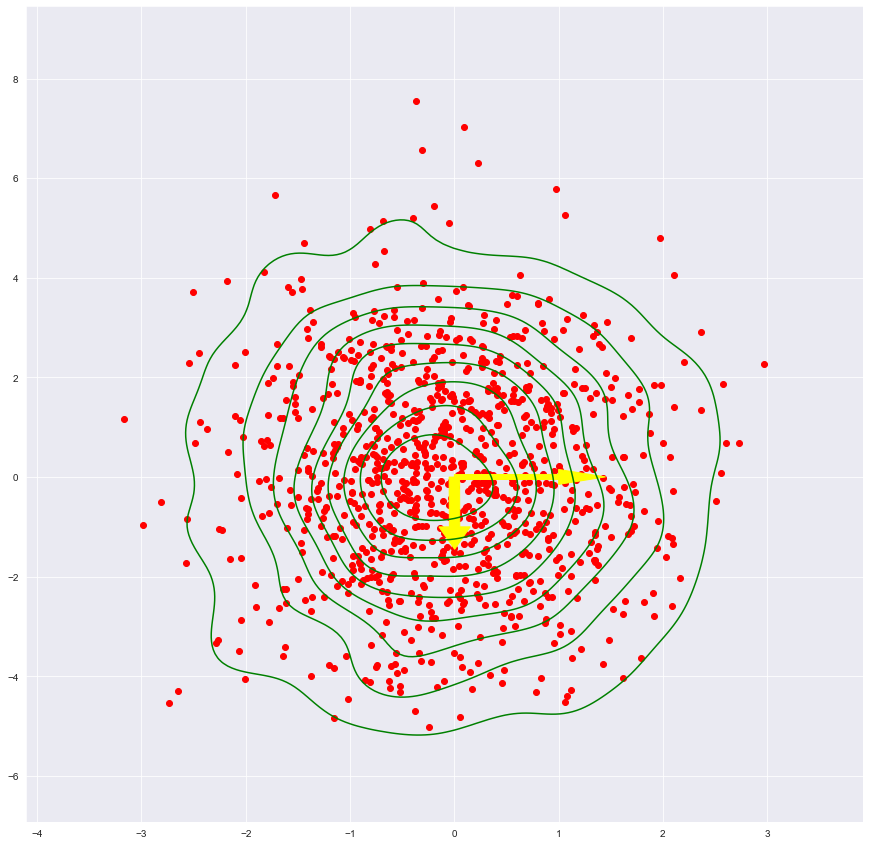

In [35]:
N = 1000
X = np.random.multivariate_normal(mean=np.array([0, 0]), cov=np.array([[1, 0], [0, 4]]), size=N)
U, S, VT = svd(X, full_matrices=False)

plt.figure(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1], color='red')

plt.arrow(0, 0, VT[0, 0], VT[0, 1], color='yellow', width=0.1)
plt.arrow(0, 0, VT[1, 0], VT[1, 1], color='yellow', width=0.1)
sns.kdeplot(data=X, shade=False, color='g', x=X[:, 0], y=X[:, 1])

То, что надо

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

Чтобы использовать SVD надо было сделать центром облака (0,0), для этого можно просто поставить среднее значение (0,0)